In [2]:
import requests
from pathlib import Path

base_dir = Path("./downloads")
custom_image_path = base_dir / "custom_pizza.jpg"

if not custom_image_path.is_file():
  url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg"
  print("Downloading image...")
  image_content = requests.get(url).content
  with open(custom_image_path, "wb") as fp:
    fp.write(image_content)
else:
  print("Image exists. Skipping download.")

torch.Size([3, 4032, 3024])
torch.uint8


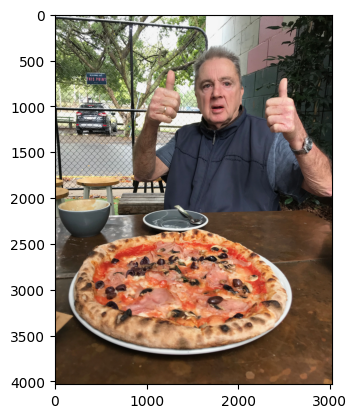

In [6]:
import torch
import torchvision
import matplotlib.pyplot as plt

# torchvision.io.read_image

custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
print(custom_image_uint8.shape)
print(custom_image_uint8.dtype)
plt.imshow(custom_image_uint8.permute(1, 2, 0))

In [7]:
custom_image_tensor = custom_image_uint8.to(torch.float32) / 255. # we need the values to be ranged from 0 to 1
custom_image_tensor[:10]

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

Original shape:  torch.Size([3, 4032, 3024])
Transformed shape:  torch.Size([3, 224, 224])


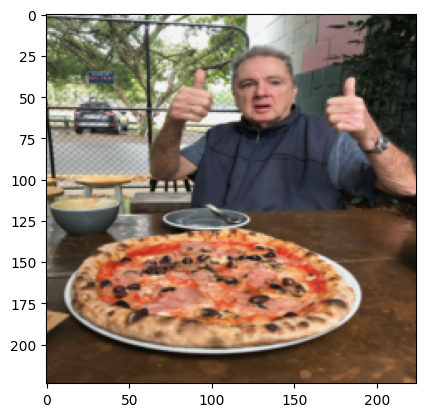

In [10]:
from torchvision import transforms
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)), # size of the input in your model
])

custom_image_transformed = custom_image_transform(custom_image_tensor)

print("Original shape: ", custom_image_tensor.shape)
print("Transformed shape: ", custom_image_transformed.shape)
plt.imshow(custom_image_transformed.permute(1, 2, 0))

In [ ]:
# model.eval()
# with torch.inference_mode():
#     custom_image_pred = model(custom_image_transformed) # error different device type (put on gpu)

# model.eval()
# with torch.inference_mode():
#     custom_image_pred = model(custom_image_transformed.to(device)) # error no batch size (add unsqueeze(0))

# model.eval()
# with torch.inference_mode():
#     custom_image_pred = model(custom_image_transformed.unsqueeze(0).to(device))

In [ ]:
# logits -> prediction probabilities
# custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
# custom_image_pred_probs

In [ ]:
# prediction probabilities -> prediction labels
# custom_image_pred_labels = custom_image_pred_probs.argmax(dim=1)
# custom_image_pred_labels

In [ ]:
# class_names[custom_image_pred_labels.cpu()[0].item()]

In [ ]:
from typing import List


def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = "cuda" if torch.cuda.is_available() else "cpu"):
  """Makes a prediction on a target image with a trained model and plot the image with its prediction probability."""
  # Load in the image
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
  
  # Divide image pixel values by 255 to get them between 0 and 1
  target_image = target_image / 255.0

  if transform:
    target_image = transform(target_image).unsqueeze(0)
  else:
    target_image = target_image.unsqueeze(0)
    
  target_image.to(device)
    
  model.eval()
  
  # Get predictions
  with torch.inference_mode():
    target_image_pred = model(target_image)

  # Convert logits -> pred probs
  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

  # Convert pred probs -> pred labels
  target_image_pred_labels = target_image_pred_probs.argmax(dim=1)
  
  # Plot image and probabilities
  plt.imshow(target_image.squeeze().permute(1, 2, 0)) # squeeze to remove batch dimension
  if class_names:
    title = f"Pred: {class_names[target_image_pred_labels.cpu()]}, Prob: {target_image_pred_probs.max().cpu():.3f}"
  else:
    title = f"Pred: {target_image_pred_labels.cpu().item()}, Prob: {target_image_pred_probs.max().cpu():.3f}"
  
  plt.title(title)
  plt.axis(False)

In [ ]:
# Predict on custom image
# pred_and_plot_image(model=model,
#                     image_path=custom_image_path,
#                     class_names=class_names,
#                     transform=custom_image_transform,
#                     device=device)

In [ ]:
# check torch data
# check exercises in 04 PyTorch custom Datasets